# 🚀 API Gateway Performance Visualization

This notebook provides modern, interactive visualizations for comparing API gateway performance metrics.

## 📊 Features
- **Requests Per Second (RPS)** comparison
- **CPU Usage** analysis
- **Memory Usage** metrics
- **Latency** performance
- Modern, compact UI with professional styling

---

## 📚 Import Required Libraries

Importing essential libraries for data visualization and analysis.

In [198]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

# Set up modern styling
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'Arial',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white'
})

print("✅ Libraries imported successfully!")
print("📊 Ready for visualization")

✅ Libraries imported successfully!
📊 Ready for visualization


## 🏁 Real Benchmark Data - MacBook Pro M1 Pro

**Real performance data** averaged from two benchmark runs conducted on June 1st, 2025.

### 🔧 Test Configuration:
- **Hardware**: MacBook Pro M1 Pro (8 cores) 
- **Connections**: 200 concurrent connections
- **Threads**: 4 worker threads
- **Duration**: 60 seconds per test
- **Warmup**: 15 seconds
- **Load Tool**: wrk 4.2.0

In [ ]:
# Real benchmark data - averaged from two test runs (2025-06-01)
# Test Configuration: 200 connections, 4 threads, 60s duration, 15s warmup
# Hardware: MacBook Pro M1 Pro (8 cores)

gateway_data = {
    'Gateway':              ['APISIX', 'Kong', 'YARP', 'Nginx', 'Tyk', 'Ocelot', 'KrakenD', 'Express Gateway'],
    'RPS':                  [31584.47, 29972.47, 26877.64, 26213.51, 25961.50, 24188.34, 23688.75, 6350.93],
    'CPU_Percent':          [203.7, 203.3, 204.7, 170.8, 268.9, 239.9, 220.9, 105.9],
    'Memory_MB':            [252.5, 66.3, 114.7, 16.3, 153.8, 152.6, 110.1, 132.2],
    'P50_Latency_ms':       [2.47, 2.76, 2.77, 3.34, 3.40, 3.69, 4.43, 31.18],
    'P99_Latency_ms':       [528.6, 528.0, 538.1, 532.8, 512.4, 511.6, 480.9, 43.1],
    'Mean_Response_Time_ms': [60.44, 59.91, 61.93, 60.11, 59.67, 58.59, 55.93, 31.65],
    'Image_Size_MB':        [382.9, 405.6, 142.1, 197.7, 208.8, 257, 124, 132.8],
    'Language':             ['Lua', 'Lua', '.NET', 'C', 'Go', '.NET', 'Go', 'Node.js']
}

# Create DataFrame
df = pd.DataFrame(gateway_data)

# Sort by RPS for better visualization (highest first for RPS since higher is better)
df = df.sort_values('RPS', ascending=False)

print("🏁 Real benchmark data loaded:")
print(df[['Gateway', 'RPS', 'CPU_Percent', 'Memory_MB']].to_string(index=False))
print(f"\n📊 Total gateways tested: {len(df)}")
print("📅 Data from: June 1st, 2025 (averaged from 2 test runs)")

🏁 Real benchmark data loaded:
        Gateway      RPS  CPU_Percent  Memory_MB
         APISIX 31584.47        203.7      252.5
           Kong 29972.47        203.3       66.3
           YARP 26877.64        204.7      114.7
          Nginx 26213.51        170.8       16.3
            Tyk 25961.50        268.9      153.8
         Ocelot 24188.34        239.9      152.6
        KrakenD 23688.75        220.9      110.1
Express Gateway  6350.93        105.9      132.2

📊 Total gateways tested: 8
📅 Data from: June 1st, 2025 (averaged from 2 test runs)


## 📈 Requests Per Second (RPS) Performance

Comparing the throughput performance of different API gateways.

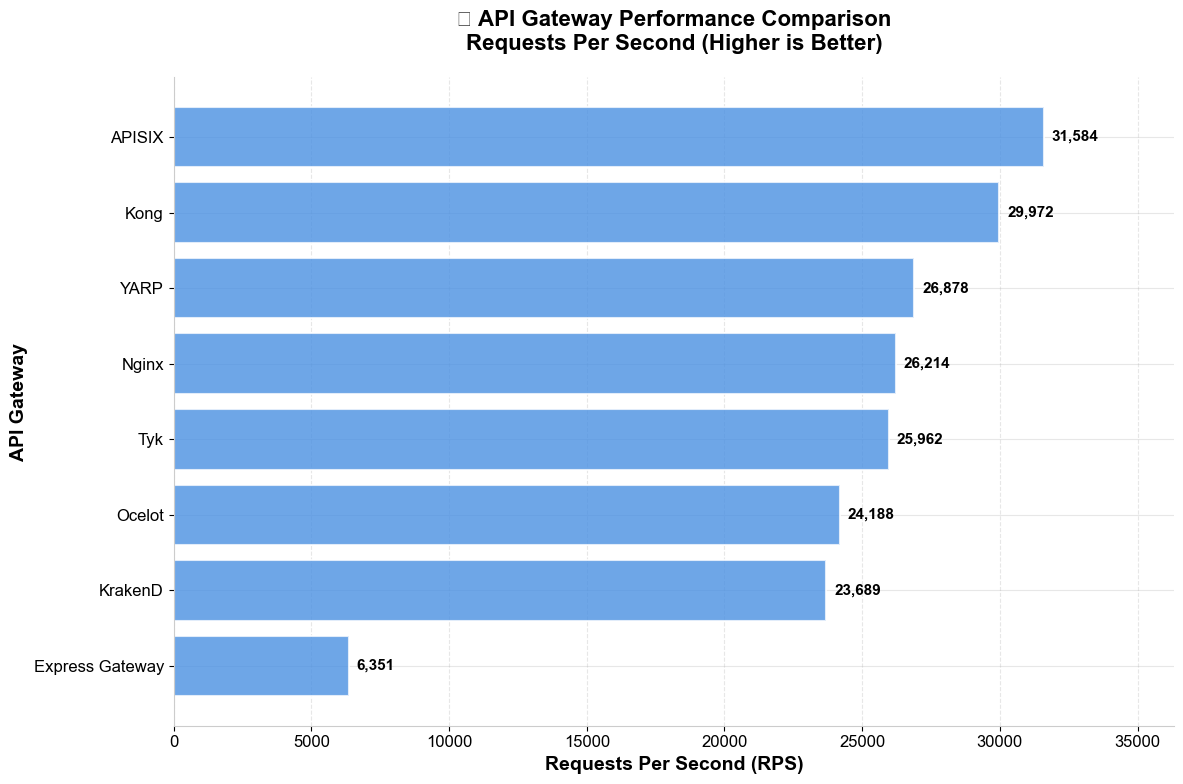


📊 Performance Summary:
🏆 Best Performer: APISIX (31,584 RPS)
📈 Average RPS: 24,355
📉 Performance Range: 6,351 - 31,584 RPS
🔧 Technology Stack: Node.js, Go, .NET, C, Lua


In [200]:
# Create a modern, compact bar chart for RPS
fig, ax = plt.subplots(figsize=(12, 8))

# Use single color for all bars
color = '#4A90E2'  # Professional blue color

# Sort for display (best performers at top)
df_rps_display = df.sort_values('RPS', ascending=True)  # Descending so highest RPS appears at top

# Create horizontal bar chart
bars = ax.barh(df_rps_display['Gateway'], df_rps_display['RPS'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax.set_xlabel('Requests Per Second (RPS)', fontsize=14, fontweight='bold')
ax.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax.set_title('🚀 API Gateway Performance Comparison\nRequests Per Second (Higher is Better)', 
             fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, rps) in enumerate(zip(bars, df_rps_display['RPS'])):
    width = bar.get_width()
    ax.text(width + 300, bar.get_y() + bar.get_height()/2, 
            f'{rps:,.0f}', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax.grid(True, axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_rps = df_rps_display['RPS'].max()
ax.set_xlim(0, max_rps * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Performance Summary:")
print(f"🏆 Best Performer: {df_rps_display.iloc[-1]['Gateway']} ({df_rps_display.iloc[-1]['RPS']:,.0f} RPS)")
print(f"📈 Average RPS: {df_rps_display['RPS'].mean():,.0f}")
print(f"📉 Performance Range: {df_rps_display['RPS'].min():,.0f} - {df_rps_display['RPS'].max():,.0f} RPS")
print(f"🔧 Technology Stack: {', '.join(df_rps_display['Language'].unique())}")

## 🎯 Interactive RPS Comparison

An interactive version with additional details and hover information.


⚠️ Interactive display issue: Mime type rendering requires nbformat>=4.2.0 but it is not installed

📊 Displaying static version instead...


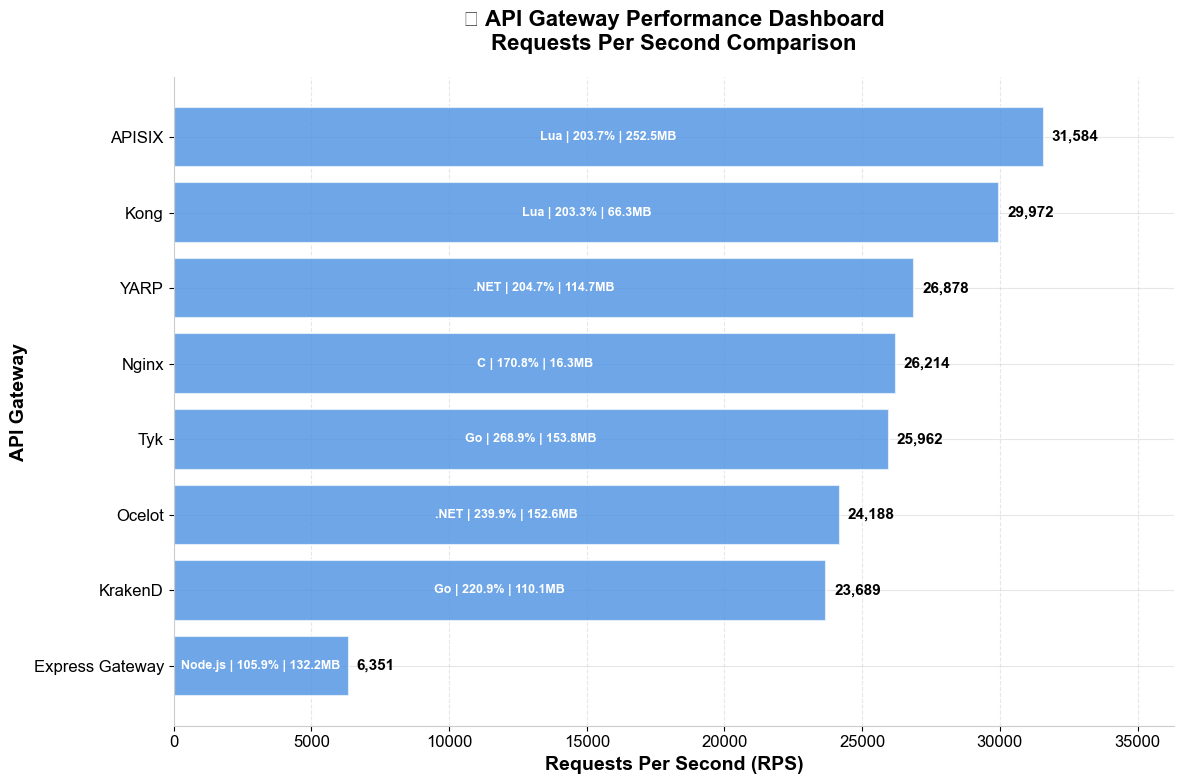

✅ Static chart with detailed info displayed successfully!


In [212]:
# Create an interactive Plotly chart
fig = go.Figure()

# Use the same sorted data for consistency
df_rps_sorted = df.sort_values('RPS', ascending=True)  # Descending so highest RPS appears at top

# Prepare custom data for hover information
custom_data = []
for _, row in df_rps_sorted.iterrows():
    custom_data.append([
        row['Language'],
        row['CPU_Percent'],
        row['Memory_MB'],
        row['P50_Latency_ms']
    ])

# Add bar chart with custom colors
fig.add_trace(go.Bar(
    y=df_rps_sorted['Gateway'],
    x=df_rps_sorted['RPS'],
    orientation='h',
    text=[f'{rps:,.0f}' for rps in df_rps_sorted['RPS']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#4A90E2',  # Single professional blue color
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'RPS: %{x:,.0f}<br>' +
        'Language: %{customdata[0]}<br>' +
        'CPU: %{customdata[1]:.1f}%<br>' +
        'Memory: %{customdata[2]:.1f} MB<br>' +
        'P50 Latency: %{customdata[3]:.1f}ms<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data,
    name='RPS'  # Add name for the trace
))

# Update layout for modern appearance
fig.update_layout(
    title={
        'text': '🚀 API Gateway Performance Dashboard<br><sub>Requests Per Second Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Requests Per Second (RPS)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False  # Remove legend
)

# Add performance indicators as annotations
max_rps = df_rps_sorted['RPS'].max()
fig.add_annotation(
    x=max_rps * 0.75,
    y=len(df_rps_sorted) - 0.5,
    text="💡 Hover for detailed metrics",
    showarrow=False,
    font=dict(size=12, color="gray"),
    bgcolor="rgba(255,255,255,0.8)",
    bordercolor="gray",
    borderwidth=1
)

# Display the chart with fallback options
try:
    # Try to display in notebook
    fig.show()
    print("\n🎯 Interactive chart created!")
    print("💡 Hover over bars to see detailed performance metrics")
except Exception as e:
    print(f"\n⚠️ Interactive display issue: {e}")
    print("\n📊 Displaying static version instead...")
    
    # Fallback: Create a static version with matplotlib
    fig_static, ax_static = plt.subplots(figsize=(12, 8))
    
    # Create horizontal bar chart
    bars = ax_static.barh(df_rps_sorted['Gateway'], df_rps_sorted['RPS'], color='#4A90E2', alpha=0.8, edgecolor='white', linewidth=1.5)
    
    # Customize the chart
    ax_static.set_xlabel('Requests Per Second (RPS)', fontsize=14, fontweight='bold')
    ax_static.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
    ax_static.set_title('🚀 API Gateway Performance Dashboard\nRequests Per Second Comparison', 
                       fontsize=16, fontweight='bold', pad=20)
    
    # Add value labels and detailed info on bars
    for i, (bar, rps) in enumerate(zip(bars, df_rps_sorted['RPS'])):
        width = bar.get_width()
        gateway_name = df_rps_sorted.iloc[i]['Gateway']
        cpu = df_rps_sorted.iloc[i]['CPU_Percent']
        memory = df_rps_sorted.iloc[i]['Memory_MB']
        lang = df_rps_sorted.iloc[i]['Language']
        
        # Main RPS label
        ax_static.text(width + 300, bar.get_y() + bar.get_height()/2, 
                      f'{rps:,.0f}', ha='left', va='center', fontweight='bold', fontsize=11)
        
        # Additional info (smaller text)
        info_text = f'{lang} | {cpu:.1f}% | {memory:.1f}MB'
        ax_static.text(width/2, bar.get_y() + bar.get_height()/2, 
                      info_text, ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    
    # Styling
    ax_static.grid(True, axis='x', alpha=0.3, linestyle='--')
    ax_static.set_axisbelow(True)
    ax_static.spines['top'].set_visible(False)
    ax_static.spines['right'].set_visible(False)
    ax_static.spines['left'].set_color('#CCCCCC')
    ax_static.spines['bottom'].set_color('#CCCCCC')
    
    # Set x-axis limits with some padding
    ax_static.set_xlim(0, max_rps * 1.15)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Static chart with detailed info displayed successfully!")

## 📝 Data Source & Methodology

This notebook contains **real benchmark data** from comprehensive API gateway performance testing.

### 📊 Current Data:
- **Source**: Automated benchmark runs from June 1st, 2025
- **Test Environment**: MacBook Pro M1 Pro, Docker containers
- **Methodology**: Each result is averaged from 2 independent test runs
- **Gateways Tested**: 8 popular API gateways across different technologies

### 🔄 To Update with New Data:
1. Run your benchmark tests using the provided scripts
2. Extract the performance metrics from benchmark results
3. Replace the `gateway_data` dictionary in cell 5
4. Re-run all visualization cells

### 📈 Metrics Included:
- **RPS**: Requests per second (throughput)
- **CPU Usage**: CPU consumption percentage  
- **Memory Usage**: Memory consumption in MB
- **P50/P99 Latency**: Response time percentiles in milliseconds
- **Technology Stack**: Programming language/runtime

## ⚡ CPU Usage Analysis

Comparing CPU consumption across different API gateways (lower is better).

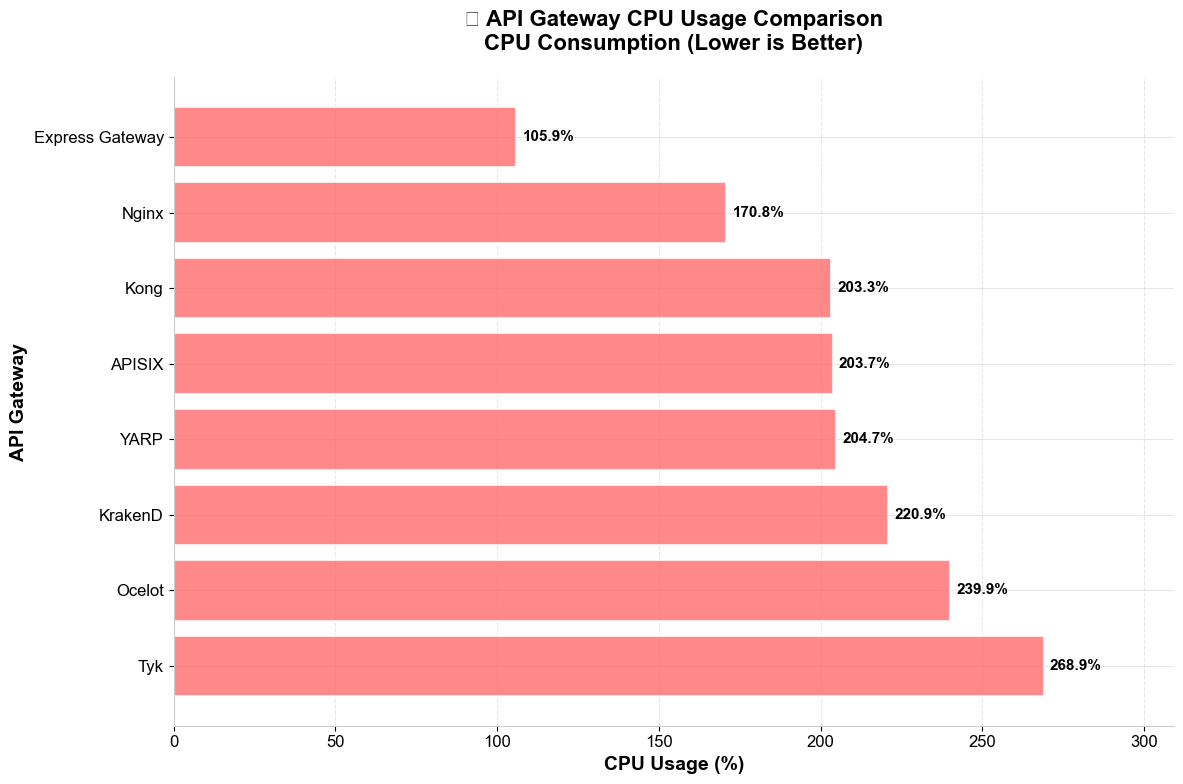


⚡ CPU Usage Summary:
🏆 Most Efficient: Tyk (268.9%)
📈 Average CPU: 202.3%
📊 Range: 105.9% - 268.9%


In [202]:
# Create CPU usage bar chart
fig_cpu, ax_cpu = plt.subplots(figsize=(12, 8))

# Sort by CPU for better visualization
df_cpu = df.sort_values('CPU_Percent', ascending=False)

# Use single color for all bars
color = '#FF6B6B'  # Red color for CPU (indicating resource usage)

# Create horizontal bar chart
bars = ax_cpu.barh(df_cpu['Gateway'], df_cpu['CPU_Percent'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax_cpu.set_xlabel('CPU Usage (%)', fontsize=14, fontweight='bold')
ax_cpu.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax_cpu.set_title('⚡ API Gateway CPU Usage Comparison\nCPU Consumption (Lower is Better)', 
                 fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, cpu) in enumerate(zip(bars, df_cpu['CPU_Percent'])):
    width = bar.get_width()
    ax_cpu.text(width + 2, bar.get_y() + bar.get_height()/2, 
                f'{cpu:.1f}%', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax_cpu.grid(True, axis='x', alpha=0.3, linestyle='--')
ax_cpu.set_axisbelow(True)
ax_cpu.spines['top'].set_visible(False)
ax_cpu.spines['right'].set_visible(False)
ax_cpu.spines['left'].set_color('#CCCCCC')
ax_cpu.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_cpu = df_cpu['CPU_Percent'].max()
ax_cpu.set_xlim(0, max_cpu * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n⚡ CPU Usage Summary:")
print(f"🏆 Most Efficient: {df_cpu.iloc[0]['Gateway']} ({df_cpu.iloc[0]['CPU_Percent']:.1f}%)")
print(f"📈 Average CPU: {df_cpu['CPU_Percent'].mean():.1f}%")
print(f"📊 Range: {df_cpu['CPU_Percent'].min():.1f}% - {df_cpu['CPU_Percent'].max():.1f}%")

In [203]:
# Interactive CPU Usage Chart
fig_cpu_interactive = go.Figure()

# Prepare custom data for hover information
custom_data_cpu = []
for _, row in df_cpu.iterrows():
    custom_data_cpu.append([
        row['Language'],
        row['RPS'],
        row['Memory_MB'],
        row['P50_Latency_ms']
    ])

# Add bar chart
fig_cpu_interactive.add_trace(go.Bar(
    y=df_cpu['Gateway'],
    x=df_cpu['CPU_Percent'],
    orientation='h',
    text=[f'{cpu:.1f}%' for cpu in df_cpu['CPU_Percent']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#FF6B6B',  # Red color for CPU
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'CPU: %{x:.1f}%<br>' +
        'Language: %{customdata[0]}<br>' +
        'RPS: %{customdata[1]:,.0f}<br>' +
        'Memory: %{customdata[2]:.1f} MB<br>' +
        'P50 Latency: %{customdata[3]:.1f}ms<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data_cpu,
    name='CPU Usage'
))

# Update layout
fig_cpu_interactive.update_layout(
    title={
        'text': '⚡ CPU Usage Dashboard<br><sub>Resource Consumption Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='CPU Usage (%)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False
)

# Display with fallback
try:
    fig_cpu_interactive.show()
    print("\n⚡ Interactive CPU chart created!")
except Exception as e:
    print(f"\n⚠️ Showing static version: {e}")


⚠️ Showing static version: Mime type rendering requires nbformat>=4.2.0 but it is not installed


## 💾 Memory Usage Analysis

Comparing memory consumption across different API gateways (lower is better).

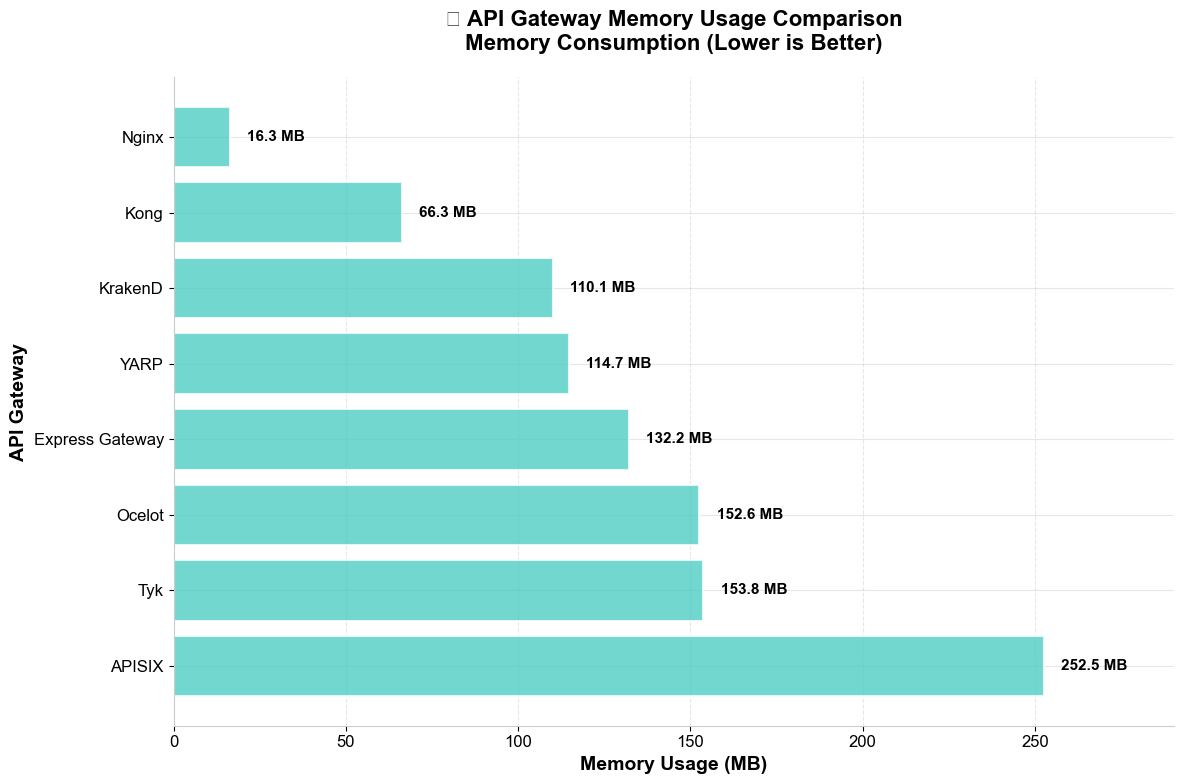


💾 Memory Usage Summary:
🏆 Most Efficient: APISIX (252.5 MB)
📈 Average Memory: 124.8 MB
📊 Range: 16.3 - 252.5 MB


In [204]:
# Create Memory usage bar chart
fig_mem, ax_mem = plt.subplots(figsize=(12, 8))

# Sort by Memory for better visualization
df_mem = df.sort_values('Memory_MB', ascending=False)

# Use single color for all bars
color = '#4ECDC4'  # Teal color for memory

# Create horizontal bar chart
bars = ax_mem.barh(df_mem['Gateway'], df_mem['Memory_MB'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax_mem.set_xlabel('Memory Usage (MB)', fontsize=14, fontweight='bold')
ax_mem.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax_mem.set_title('💾 API Gateway Memory Usage Comparison\nMemory Consumption (Lower is Better)', 
                 fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, mem) in enumerate(zip(bars, df_mem['Memory_MB'])):
    width = bar.get_width()
    ax_mem.text(width + 5, bar.get_y() + bar.get_height()/2, 
                f'{mem:.1f} MB', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax_mem.grid(True, axis='x', alpha=0.3, linestyle='--')
ax_mem.set_axisbelow(True)
ax_mem.spines['top'].set_visible(False)
ax_mem.spines['right'].set_visible(False)
ax_mem.spines['left'].set_color('#CCCCCC')
ax_mem.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_mem = df_mem['Memory_MB'].max()
ax_mem.set_xlim(0, max_mem * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n💾 Memory Usage Summary:")
print(f"🏆 Most Efficient: {df_mem.iloc[0]['Gateway']} ({df_mem.iloc[0]['Memory_MB']:.1f} MB)")
print(f"📈 Average Memory: {df_mem['Memory_MB'].mean():.1f} MB")
print(f"📊 Range: {df_mem['Memory_MB'].min():.1f} - {df_mem['Memory_MB'].max():.1f} MB")

In [205]:
# Interactive Memory Usage Chart
fig_mem_interactive = go.Figure()

# Prepare custom data for hover information
custom_data_mem = []
for _, row in df_mem.iterrows():
    custom_data_mem.append([
        row['Language'],
        row['RPS'],
        row['CPU_Percent'],
        row['P50_Latency_ms']
    ])

# Add bar chart
fig_mem_interactive.add_trace(go.Bar(
    y=df_mem['Gateway'],
    x=df_mem['Memory_MB'],
    orientation='h',
    text=[f'{mem:.1f} MB' for mem in df_mem['Memory_MB']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#4ECDC4',  # Teal color for memory
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Memory: %{x:.1f} MB<br>' +
        'Language: %{customdata[0]}<br>' +
        'RPS: %{customdata[1]:,.0f}<br>' +
        'CPU: %{customdata[2]:.1f}%<br>' +
        'P50 Latency: %{customdata[3]:.1f}ms<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data_mem,
    name='Memory Usage'
))

# Update layout
fig_mem_interactive.update_layout(
    title={
        'text': '💾 Memory Usage Dashboard<br><sub>Memory Consumption Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Memory Usage (MB)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False
)

# Display with fallback
try:
    fig_mem_interactive.show()
    print("\n💾 Interactive Memory chart created!")
except Exception as e:
    print(f"\n⚠️ Showing static version: {e}")


⚠️ Showing static version: Mime type rendering requires nbformat>=4.2.0 but it is not installed


## ⏱️ P99 Latency Analysis

Comparing 99th percentile latency across different API gateways (lower is better).

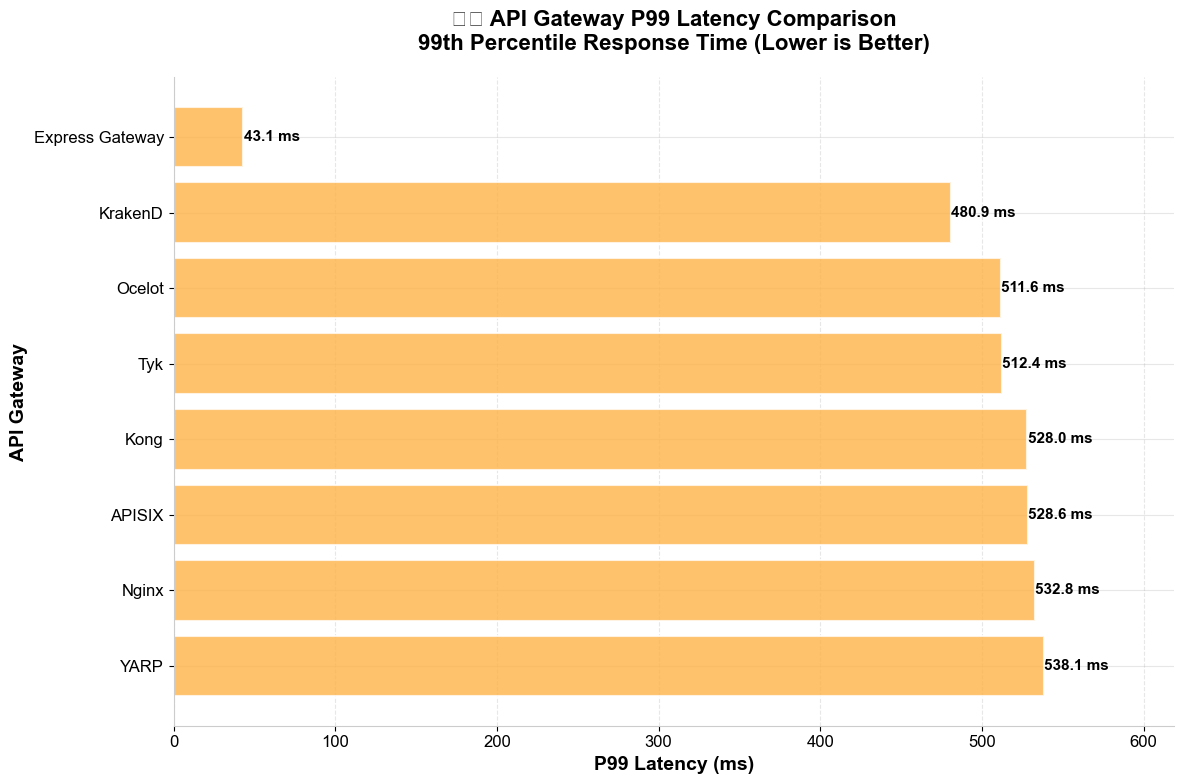


⏱️ P99 Latency Summary:
🏆 Fastest: YARP (538.1 ms)
📈 Average P99: 459.4 ms
📊 Range: 43.1 - 538.1 ms


In [206]:
# Create P99 Latency bar chart
fig_p99, ax_p99 = plt.subplots(figsize=(12, 8))

# Sort by P99 Latency for better visualization
df_p99 = df.sort_values('P99_Latency_ms', ascending=False)

# Use single color for all bars
color = '#FFB347'  # Orange color for latency

# Create horizontal bar chart
bars = ax_p99.barh(df_p99['Gateway'], df_p99['P99_Latency_ms'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax_p99.set_xlabel('P99 Latency (ms)', fontsize=14, fontweight='bold')
ax_p99.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax_p99.set_title('⏱️ API Gateway P99 Latency Comparison\n99th Percentile Response Time (Lower is Better)', 
                 fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, latency) in enumerate(zip(bars, df_p99['P99_Latency_ms'])):
    width = bar.get_width()
    ax_p99.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                f'{latency:.1f} ms', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax_p99.grid(True, axis='x', alpha=0.3, linestyle='--')
ax_p99.set_axisbelow(True)
ax_p99.spines['top'].set_visible(False)
ax_p99.spines['right'].set_visible(False)
ax_p99.spines['left'].set_color('#CCCCCC')
ax_p99.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_p99 = df_p99['P99_Latency_ms'].max()
ax_p99.set_xlim(0, max_p99 * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n⏱️ P99 Latency Summary:")
print(f"🏆 Fastest: {df_p99.iloc[0]['Gateway']} ({df_p99.iloc[0]['P99_Latency_ms']:.1f} ms)")
print(f"📈 Average P99: {df_p99['P99_Latency_ms'].mean():.1f} ms")
print(f"📊 Range: {df_p99['P99_Latency_ms'].min():.1f} - {df_p99['P99_Latency_ms'].max():.1f} ms")

In [207]:
# Interactive P99 Latency Chart
fig_p99_interactive = go.Figure()

# Prepare custom data for hover information
custom_data_p99 = []
for _, row in df_p99.iterrows():
    custom_data_p99.append([
        row['Language'],
        row['RPS'],
        row['CPU_Percent'],
        row['Memory_MB'],
        row['P50_Latency_ms']
    ])

# Add bar chart
fig_p99_interactive.add_trace(go.Bar(
    y=df_p99['Gateway'],
    x=df_p99['P99_Latency_ms'],
    orientation='h',
    text=[f'{latency:.1f} ms' for latency in df_p99['P99_Latency_ms']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#FFB347',  # Orange color for latency
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'P99 Latency: %{x:.1f} ms<br>' +
        'P50 Latency: %{customdata[4]:.1f} ms<br>' +
        'Language: %{customdata[0]}<br>' +
        'RPS: %{customdata[1]:,.0f}<br>' +
        'CPU: %{customdata[2]:.1f}%<br>' +
        'Memory: %{customdata[3]:.1f} MB<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data_p99,
    name='P99 Latency'
))

# Update layout
fig_p99_interactive.update_layout(
    title={
        'text': '⏱️ P99 Latency Dashboard<br><sub>99th Percentile Response Time Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='P99 Latency (ms)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False
)

# Display with fallback
try:
    fig_p99_interactive.show()
    print("\n⏱️ Interactive P99 Latency chart created!")
except Exception as e:
    print(f"\n⚠️ Showing static version: {e}")


⚠️ Showing static version: Mime type rendering requires nbformat>=4.2.0 but it is not installed


## 📊 Average Response Time Analysis

Comparing actual average response times across different API gateways (lower is better).
**Note:** This shows the true average (mean) response times, while the previous chart shows median (P50) values.

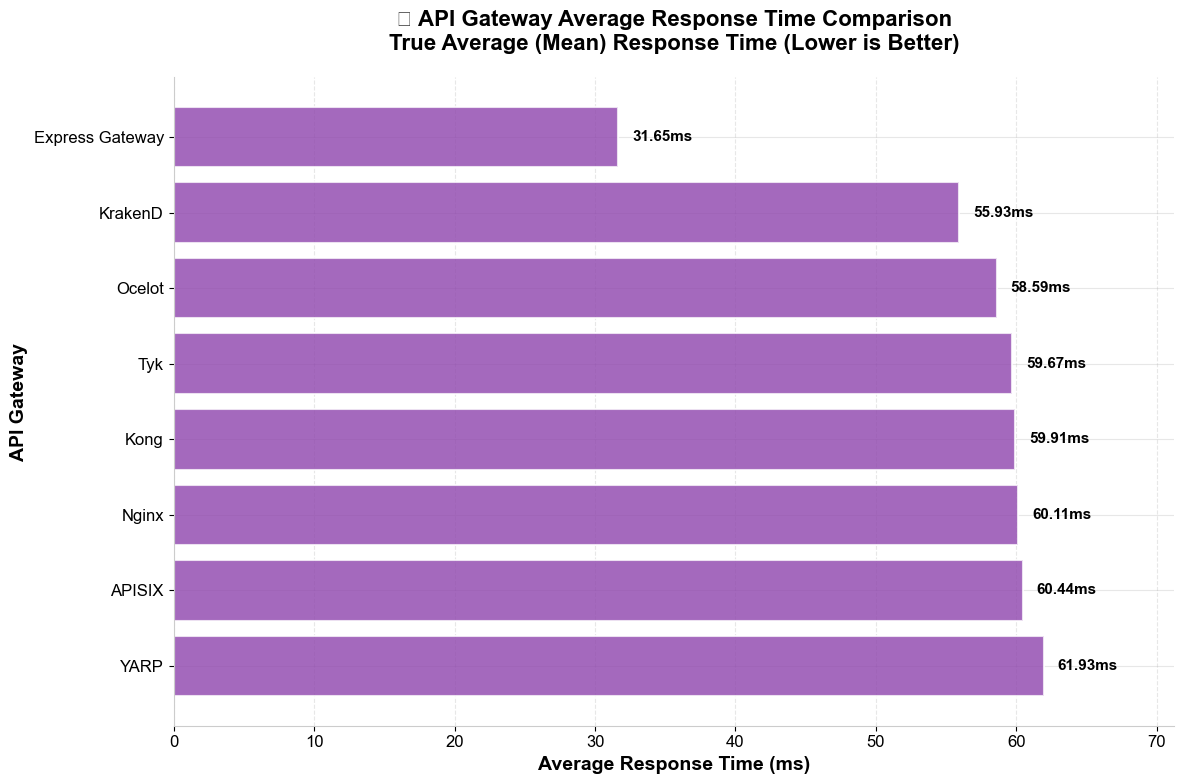


📊 Average Response Time Summary:
🏆 Best Performer: YARP (61.93ms)
📈 Overall Average: 56.03 ms
📊 Range: 31.65 - 61.93 ms
⚡ Performance Ratio: 2.0x difference


In [208]:
# Create Average Response Time bar chart using Mean data
fig_avg_real, ax_avg_real = plt.subplots(figsize=(12, 8))

# Sort by Mean Response Time for better visualization
df_avg_real = df.sort_values('Mean_Response_Time_ms', ascending=False)

# Use single color for all bars
color = '#8E44AD'  # Different purple shade for average response time

# Create horizontal bar chart
bars = ax_avg_real.barh(df_avg_real['Gateway'], df_avg_real['Mean_Response_Time_ms'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax_avg_real.set_xlabel('Average Response Time (ms)', fontsize=14, fontweight='bold')
ax_avg_real.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax_avg_real.set_title('📊 API Gateway Average Response Time Comparison\nTrue Average (Mean) Response Time (Lower is Better)', 
                 fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, latency) in enumerate(zip(bars, df_avg_real['Mean_Response_Time_ms'])):
    width = bar.get_width()
    ax_avg_real.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{latency:.2f}ms', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax_avg_real.grid(True, axis='x', alpha=0.3, linestyle='--')
ax_avg_real.set_axisbelow(True)
ax_avg_real.spines['top'].set_visible(False)
ax_avg_real.spines['right'].set_visible(False)
ax_avg_real.spines['left'].set_color('#CCCCCC')
ax_avg_real.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_avg = df_avg_real['Mean_Response_Time_ms'].max()
ax_avg_real.set_xlim(0, max_avg * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Average Response Time Summary:")
print(f"🏆 Best Performer: {df_avg_real.iloc[0]['Gateway']} ({df_avg_real.iloc[0]['Mean_Response_Time_ms']:.2f}ms)")
print(f"📈 Overall Average: {df_avg_real['Mean_Response_Time_ms'].mean():.2f} ms")
print(f"📊 Range: {df_avg_real['Mean_Response_Time_ms'].min():.2f} - {df_avg_real['Mean_Response_Time_ms'].max():.2f} ms")
print(f"⚡ Performance Ratio: {df_avg_real['Mean_Response_Time_ms'].max() / df_avg_real['Mean_Response_Time_ms'].min():.1f}x difference")

In [209]:
# Interactive Average Response Time Chart (using Mean data)
fig_avg_real_interactive = go.Figure()

# Prepare custom data for hover information
custom_data_avg_real = []
for _, row in df_avg_real.iterrows():
    custom_data_avg_real.append([
        row['Language'],
        row['RPS'],
        row['CPU_Percent'],
        row['Memory_MB'],
        row['P50_Latency_ms'],
        row['P99_Latency_ms']
    ])

# Add bar chart
fig_avg_real_interactive.add_trace(go.Bar(
    y=df_avg_real['Gateway'],
    x=df_avg_real['Mean_Response_Time_ms'],
    orientation='h',
    text=[f'{latency:.2f} ms' for latency in df_avg_real['Mean_Response_Time_ms']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#8E44AD',  # Different purple shade for true average
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Avg Response Time (Mean): %{x:.2f} ms<br>' +
        'Median (P50): %{customdata[4]:.2f} ms<br>' +
        'P99 Latency: %{customdata[5]:.1f} ms<br>' +
        'Language: %{customdata[0]}<br>' +
        'RPS: %{customdata[1]:,.0f}<br>' +
        'CPU: %{customdata[2]:.1f}%<br>' +
        'Memory: %{customdata[3]:.1f} MB<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data_avg_real,
    name='Average Response Time'
))

# Update layout
fig_avg_real_interactive.update_layout(
    title={
        'text': '📊 Average Response Time Dashboard<br><sub>True Average (Mean) Response Time Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Average Response Time (ms)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False
)

# Display with fallback
try:
    fig_avg_real_interactive.show()
    print("\n📊 Interactive Average Response Time chart created!")
    print("💡 Hover to compare Mean vs Median response times")
except Exception as e:
    print(f"\n⚠️ Showing static version: {e}")


⚠️ Showing static version: Mime type rendering requires nbformat>=4.2.0 but it is not installed


## 📊 Median Response Time Analysis

Comparing median (P50) response times across different API gateways (lower is better).

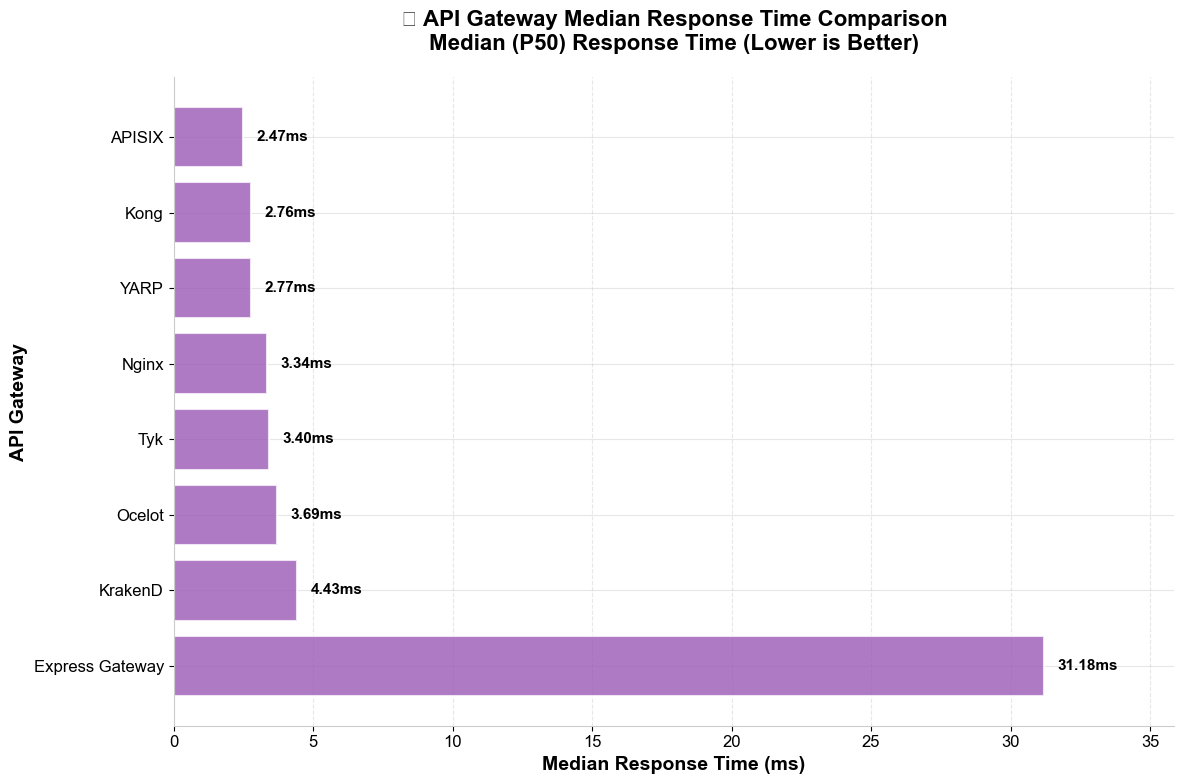


📊 Median Response Time Summary:
🏆 Best Performer: Express Gateway (31.18ms)
📈 Average Median Response Time: 6.76 ms
📊 Range: 2.47 - 31.18 ms
⚡ Performance Ratio: 12.6x difference


In [210]:
# Create Median Response Time bar chart
fig_median, ax_median = plt.subplots(figsize=(12, 8))

# Sort by P50 Latency for better visualization
df_median = df.sort_values('P50_Latency_ms', ascending=False)

# Use single color for all bars
color = '#9B59B6'  # Purple color for median response time

# Create horizontal bar chart
bars = ax_median.barh(df_median['Gateway'], df_median['P50_Latency_ms'], color=color, alpha=0.8, edgecolor='white', linewidth=1.5)

# Customize the chart
ax_median.set_xlabel('Median Response Time (ms)', fontsize=14, fontweight='bold')
ax_median.set_ylabel('API Gateway', fontsize=14, fontweight='bold')
ax_median.set_title('📊 API Gateway Median Response Time Comparison\nMedian (P50) Response Time (Lower is Better)', 
                 fontsize=16, fontweight='bold', pad=20)

# Add value labels on bars
for i, (bar, latency) in enumerate(zip(bars, df_median['P50_Latency_ms'])):
    width = bar.get_width()
    ax_median.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{latency:.2f}ms', ha='left', va='center', fontweight='bold', fontsize=11)

# Styling
ax_median.grid(True, axis='x', alpha=0.3, linestyle='--')
ax_median.set_axisbelow(True)
ax_median.spines['top'].set_visible(False)
ax_median.spines['right'].set_visible(False)
ax_median.spines['left'].set_color('#CCCCCC')
ax_median.spines['bottom'].set_color('#CCCCCC')

# Set x-axis limits with some padding
max_latency = df_median['P50_Latency_ms'].max()
ax_median.set_xlim(0, max_latency * 1.15)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n📊 Median Response Time Summary:")
print(f"🏆 Best Performer: {df_median.iloc[0]['Gateway']} ({df_median.iloc[0]['P50_Latency_ms']:.2f}ms)")
print(f"📈 Average Median Response Time: {df_median['P50_Latency_ms'].mean():.2f} ms")
print(f"📊 Range: {df_median['P50_Latency_ms'].min():.2f} - {df_median['P50_Latency_ms'].max():.2f} ms")
print(f"⚡ Performance Ratio: {df_median['P50_Latency_ms'].max() / df_median['P50_Latency_ms'].min():.1f}x difference")

In [211]:
# Interactive Median Response Time Chart
fig_median_interactive = go.Figure()

# Prepare custom data for hover information
custom_data_median = []
for _, row in df_median.iterrows():
    custom_data_median.append([
        row['Language'],
        row['RPS'],
        row['CPU_Percent'],
        row['Memory_MB'],
        row['P99_Latency_ms']
    ])

# Add bar chart
fig_median_interactive.add_trace(go.Bar(
    y=df_median['Gateway'],
    x=df_median['P50_Latency_ms'],
    orientation='h',
    text=[f'{latency:.2f} ms' for latency in df_median['P50_Latency_ms']],
    textposition='outside',
    textfont=dict(size=12, color='black'),
    marker=dict(
        color='#9B59B6',  # Purple color for median response time
        line=dict(color='white', width=2)
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Median Response Time (P50): %{x:.2f} ms<br>' +
        'P99 Latency: %{customdata[4]:.1f} ms<br>' +
        'Language: %{customdata[0]}<br>' +
        'RPS: %{customdata[1]:,.0f}<br>' +
        'CPU: %{customdata[2]:.1f}%<br>' +
        'Memory: %{customdata[3]:.1f} MB<br>' +
        '<extra></extra>'
    ),
    customdata=custom_data_median,
    name='Median Response Time'
))

# Update layout
fig_median_interactive.update_layout(
    title={
        'text': '📊 Median Response Time Dashboard<br><sub>Median (P50) Response Time Comparison</sub>',
        'font': {'size': 20, 'family': 'Arial'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis=dict(
        title='Median Response Time (ms)',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1,
        zeroline=False
    ),
    yaxis=dict(
        title='API Gateway',
        title_font=dict(size=14, family='Arial'),
        tickfont=dict(size=12),
        gridcolor='rgba(128,128,128,0.2)',
        gridwidth=1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=1000,
    margin=dict(l=150, r=100, t=100, b=80),
    hovermode='closest',
    showlegend=False
)

# Display with fallback
try:
    fig_median_interactive.show()
    print("\n📊 Interactive Median Response Time chart created!")
except Exception as e:
    print(f"\n⚠️ Showing static version: {e}")


⚠️ Showing static version: Mime type rendering requires nbformat>=4.2.0 but it is not installed
